In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
result = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/LD/LD_CARMA/geno_filt/count/nan_size_rerun3.txt', sep = ' ')

In [38]:
result


,chr,ld_blk,ld_size,nan,result,remove_maf_0.5
0,1,1,3868,0,success,False
1,1,2,3036,0,success,False
2,1,3,3263,0,success,False
3,1,4,3773,0,success,False
4,1,5,3060,0,success,False
...,...,...,...,...,...,...
2103,22,26,3498,0,success,False
2104,22,27,3386,0,success,False
2105,22,28,3228,0,success,False
2106,22,29,3103,0,success,False


In [39]:
grouped_result = result.groupby(['chr', 'remove_maf_0.5','result']).size().reset_index()
grouped_result = grouped_result.rename(columns={0: 'count'})
grouped_result

,chr,remove_maf_0.5,result,count
0,1,False,success,158
1,1,True,success,3
2,2,False,failed,2
3,2,False,success,169
4,2,True,failed,1
...,...,...,...,...
62,21,False,success,25
63,21,True,failed,1
64,21,True,success,1
65,22,False,success,28


In [44]:
result[result.result == 'failed'].size

288

In [40]:
grouped_result

,chr,remove_maf_0.5,result,count
0,1,False,success,158
1,1,True,success,3
2,2,False,failed,2
3,2,False,success,169
4,2,True,failed,1
...,...,...,...,...
62,21,False,success,25
63,21,True,failed,1
64,21,True,success,1
65,22,False,success,28


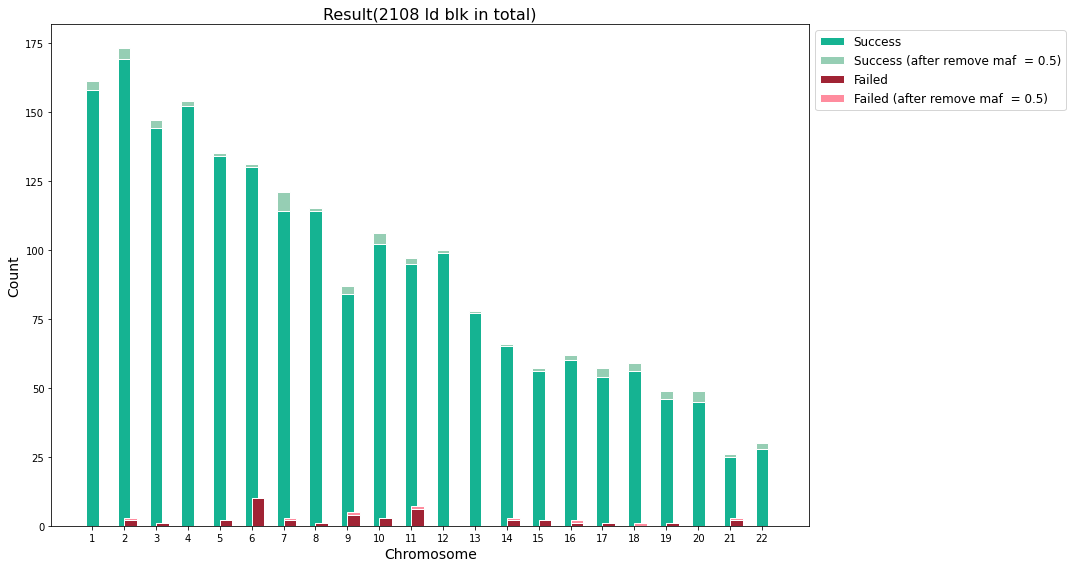

In [41]:
pivot_df = grouped_result.pivot_table(index=['chr'], columns=['result', 'remove_maf_0.5'], values='count', fill_value=0)

# Separate the columns for success and failed
success_false = pivot_df[('success', False)]
success_true = pivot_df[('success', True)]
failed_false = pivot_df[('failed', False)]
failed_true = pivot_df[('failed', True)]

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

bar_width = 0.4
x = pivot_df.index  # Chromosomes

# Success bars
ax.bar(x, success_false, bar_width, label='Success', color='#15B392', edgecolor='white')
ax.bar(x, success_true, bar_width, bottom=success_false, label='Success (after remove maf  = 0.5)', color='#96CEB4', edgecolor='white')

# Failed bars, shifted to the right by the bar width
ax.bar(x, failed_false, bar_width, label='Failed', color='#A02334', edgecolor='white', align='edge')
ax.bar(x, failed_true, bar_width, bottom=failed_false, label='Failed (after remove maf  = 0.5)', color='#FF8C9E', edgecolor='white', align='edge')

ax.set_xlabel('Chromosome',fontsize=14)
ax.set_ylabel('Count',fontsize=14)
ax.set_title('Result(2108 ld blk in total)',fontsize=16)
ax.legend(title='', bbox_to_anchor=(1, 1), loc='upper left',fontsize=12)
ax.set_xticks(x)

# Show plot with tight layout
plt.tight_layout()
plt.show()
